# Notebook for lab 1 

In [1]:
import numpy as np
import maze_minotaur as mz 
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

# Problem 1: The Maze and the Random Minotaur
The objective of problem 1 is to solve the shortest path problem in a maze. We start first by describing the maze as a numpy array. 

In [2]:
# Description of the maze as a numpy array
maze = np.array([
    [ 0,  0,  1,  0,  0,  0,  0,  0],
    [ 0,  0,  1,  0,  0,  1,  0,  0],
    [ 0,  0,  1,  0,  0,  1,  1,  1],
    [ 0,  0,  1,  0,  0,  1,  0,  0],
    [ 0,  0,  0,  0,  0,  0,  0,  0],
    [ 0,  1,  1,  1,  1,  1,  1,  0],
    [ 0,  0,  0,  0,  1,  2,  0,  0]
])
# with the convention 
# 0 = empty cell
# 1 = obstacle
# 2 = exit of the Maze

The method `maze.draw_maze()` helps us draw the maze given its numpy array discription.  

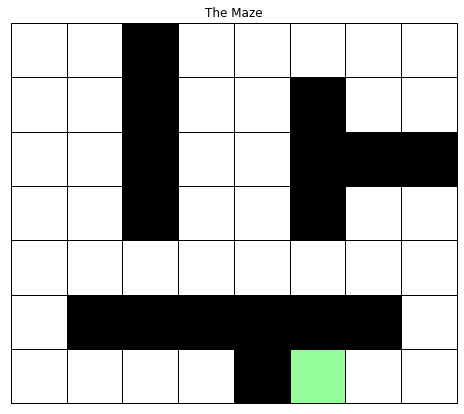

In [3]:
mz.draw_maze(maze)

In [4]:
# Create an environment maze
env = mz.Maze(maze, minotaur_cant_stay=True)
# env.show()

In [5]:
# Finite horizon
horizon = 20
# Solve the MDP problem with dynamic programming 
V, policy= mz.dynamic_programming(env,horizon)

start  = (0,0,6,5)
start_state = env.map[start]
print(f"Maximal probability of exiting the maze {V[start_state,0]}")

Maximal probability of exiting the maze 1.0


In [6]:
# Simulate the shortest path starting from position A
method = 'DynProg'
path = env.simulate(start, policy, method)

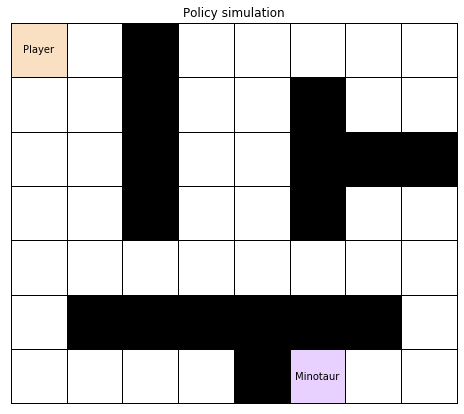

(0, 0, 5, 5)


KeyboardInterrupt: 

In [7]:
# Show the shortest path 
mz.animate_solution(maze, path)

#### Maximal probability of exiting the maze w.r.t T when minotaur CANNOT stay

In [0]:
env = mz.Maze(maze, minotaur_cant_stay=True)
start  = (0,0,6,5)
start_state = env.map[start]
max_probs = []
for T in tqdm(range(1,31)):
    horizon = T    
    # Solve the MDP problem with dynamic programming 
    V, policy= mz.dynamic_programming(env,horizon)
    # Value of start state at t=0
    max_probs.append(V[start_state, 0]) 
_ = plt.title("When minotaur cannot stay")
_ = plt.grid("on")
_ = plt.xlabel("Time Horizon T")
_ = plt.ylabel("Max P(escape)")
_ = plt.scatter(range(0,len(max_probs)), max_probs)
_ = plt.savefig("When minotaur cannot stay.png")

#### Maximal probability of exiting the maze w.r.t T when minotaur CAN stay

In [0]:
# Maximal probability of exiting the maze w.r.t T when minotaur can stay
env = mz.Maze(maze, minotaur_cant_stay=False)
start  = (0,0,6,5)
start_state = env.map[start]
max_probs = []
for T in tqdm(range(1,31)):
    horizon = T    
    # Solve the MDP problem with dynamic programming 
    V, policy= mz.dynamic_programming(env,horizon)
    # Value of start state at t=0
    max_probs.append(V[start_state, 0]) 
_ = plt.title("When minotaur can stay")
_ = plt.grid("on")
_ = plt.xlabel("Time Horizon T")
_ = plt.ylabel("Max P(escape)")
_ = plt.scatter(range(0,len(max_probs)), max_probs)
_ = plt.savefig("When minotaur can stay.png")